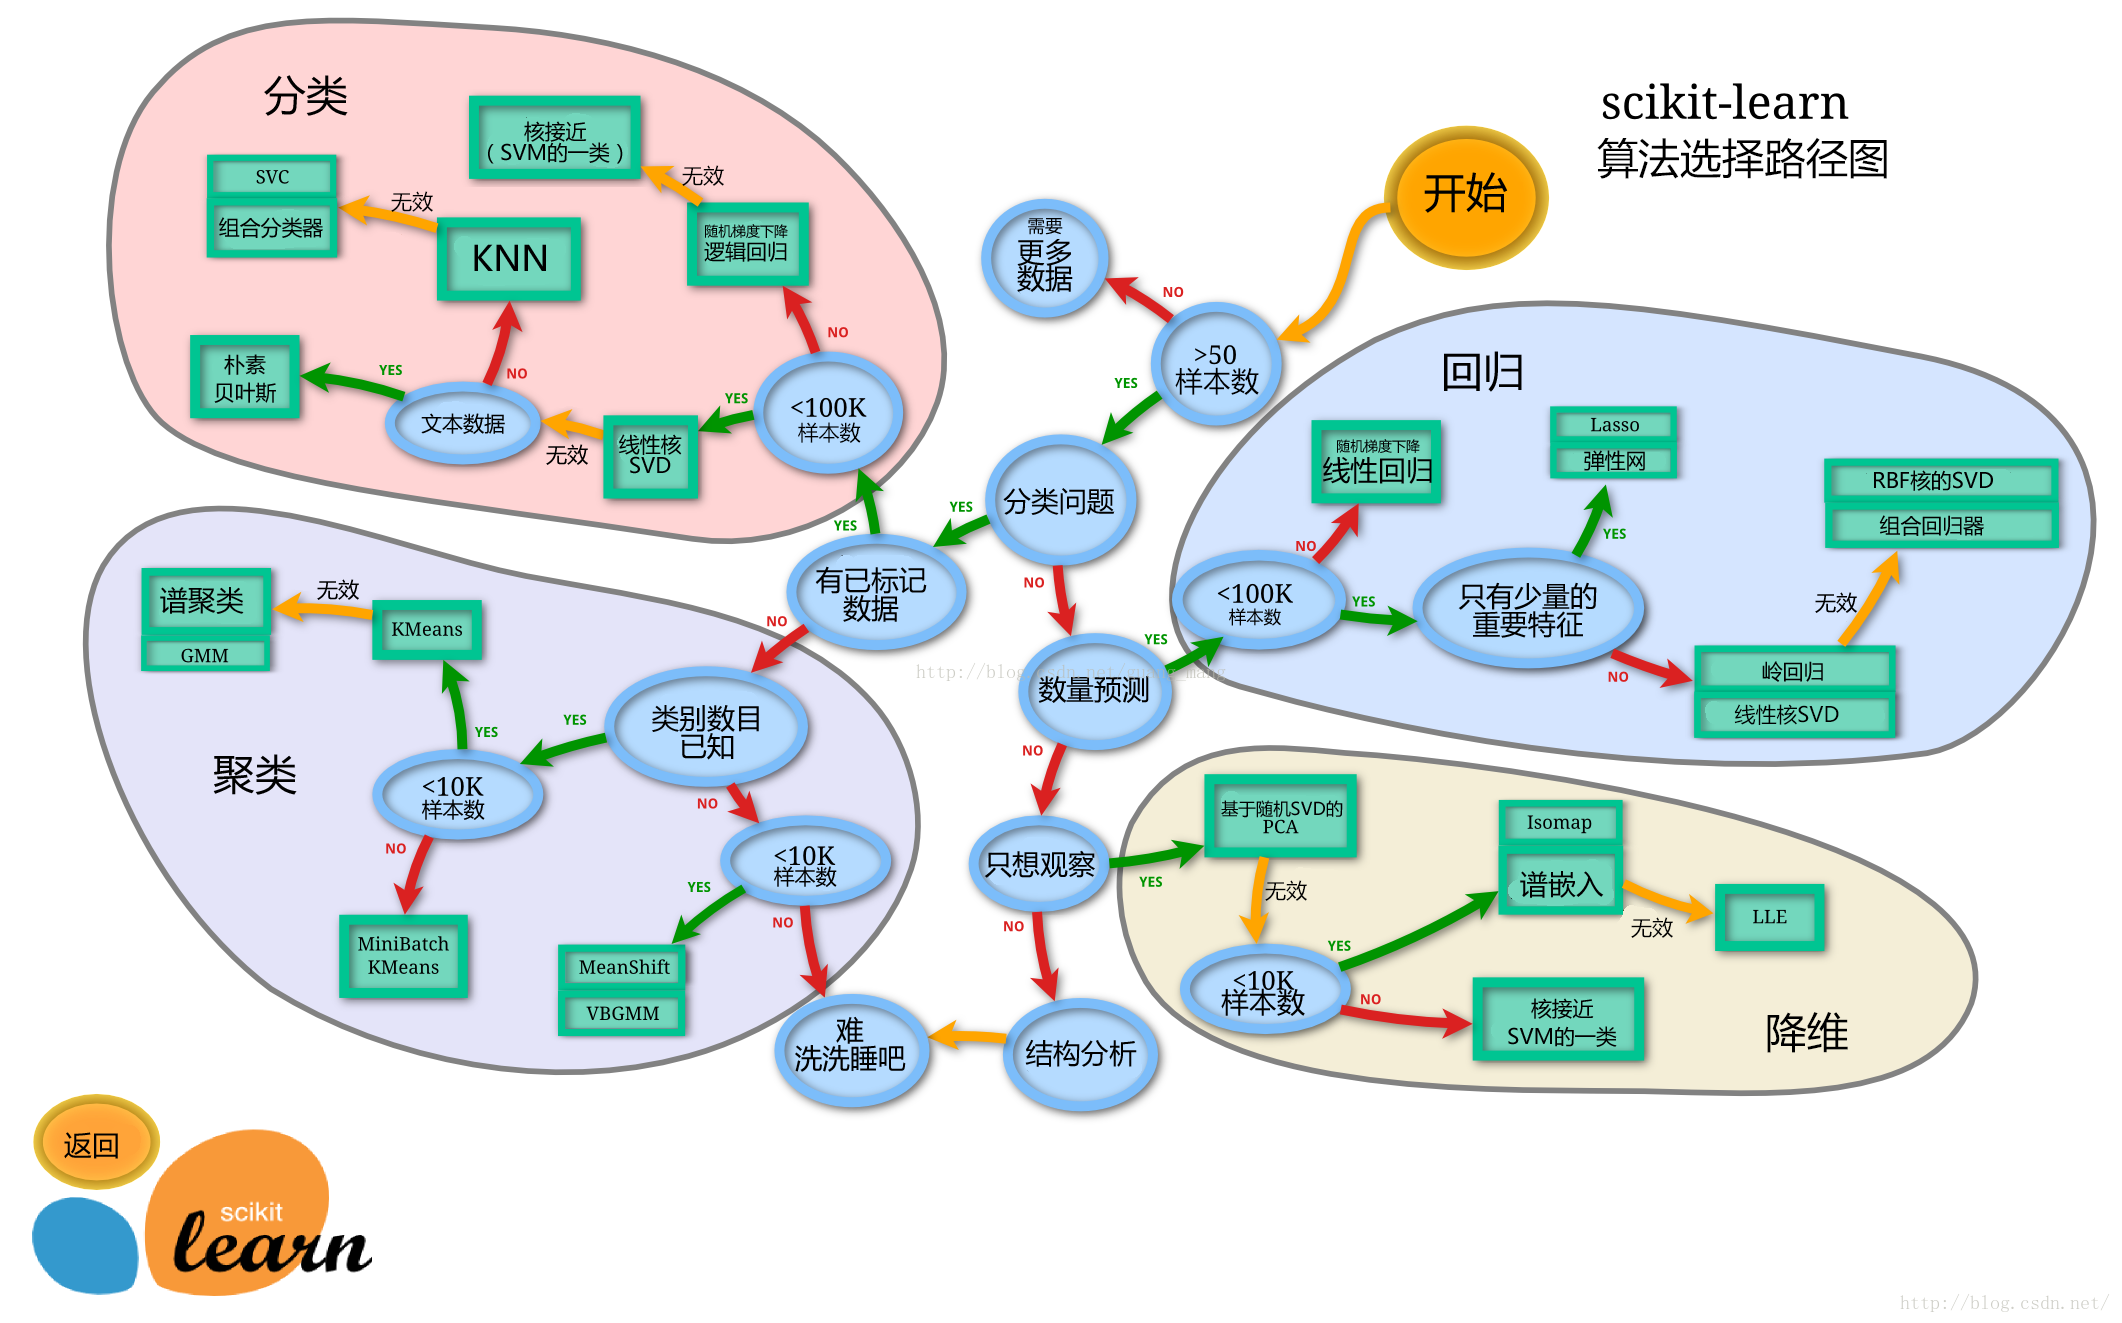

In [1]:
from IPython.display import Latex , Image, display, SVG, HTML

Image('https://raw.githubusercontent.com/datawhalechina/hands-on-data-analysis/master/%E7%AC%AC%E4%B8%89%E7%AB%A0%E9%A1%B9%E7%9B%AE%E9%9B%86%E5%90%88/20170624105439491.png', width=600, height=400) # 

In [3]:
#!/usr/bin/env python3
# coding=utf-8
import pandas as pd
import numpy as np
import sqlite3
import time
from datetime import datetime, timedelta
import math
import sys
# import imp
from importlib import reload
import logging
import os
import re
from itertools import product, cycle
from matplotlib import pyplot as plt
import seaborn as sns
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import preprocessing, datasets, model_selection, decomposition , linear_model, neighbors, ensemble, metrics, multiclass, svm
from sklearn.cluster import KMeans
import sklearn

import scipy
from scipy import stats
from scipy.spatial.distance import cdist

from IPython.display import Latex , Image, display, SVG, HTML

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif']=['SimHei'] # 解决中文乱码
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (5, 3)  # 设置输出图片大小

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.model_selection import cross_val_score,GridSearchCV
# from sklearn.model_selection import KFold,StratifiedKFold
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris
# from sklearn.neighbors import KNeighborsClassifier


g_worthDir = '../pkl'  # 
g_parentDir = '../../..'  # 
g_dbfile = f"{g_parentDir}/pkl/hq.db" # 
g_name = g_access = 'stk'
df = pd.DataFrame()

g_locTimeadj = 28800 # 28800 0
g_version = '1.0.1'

print(f"{sys.version} , {sys.executable} , sklearn: {sklearn.__version__}")
print(f"{time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time()+g_locTimeadj))} *****import**v{g_version}*** ")
print(f"*****获取数据 -> 数据预处理 -> 训练建模 -> 模型评估 -> 预测/分类*****")



3.10.4 (main, Aug 22 2022, 22:50:25) [GCC 9.4.0] , /opt/python/latest/bin/python , sklearn: 1.1.2
2022-11-04 23:54:41 *****import**v1.0.1*** 
*****获取数据 -> 数据预处理 -> 训练建模 -> 模型评估 -> 预测/分类*****


In [6]:
# I. 获取数据
# from tkinter import Y

iris = datasets.load_iris() # 导入数据集  sklearn.utils._bunch.Bunch

# load_boston([return_x_y]) # 加载波士顿房屋价格(用于回归建模)
# load_diabetes([return_x_y]) # 加载并返回糖尿病数据集(回归)
# load_digits([return_x_y]) # 加载并返回数字数据集(分类)
# load_breast_canner([n_class,return_x_y]) # 加载并返回威斯康星州乳腺癌数据集(分类)
# load_iris([return_x_y]) # 加载并返回鸢尾花数据集(分类)
# load_wine([return_x_y]) # 加载并返回wine数据集(分类)
# load_linnerud([return_x_y]) # 加载并返回linnerud数据集(多元回归)

# pandas.io加载CSV,EXCEL,JSON,SQL等类型数据
# scipy.io可以加载.mat,.arff格式的数据
# skimage.io或者Imageio加载图象或者视频数据, 并将数据处理为Numpy的数据类型数据
# scipy.io.wavfile.read()函数读取WAV形式的音频数据

x = iris.data      # 获得其特征向量, 获得数据集的特征值, 数据个数 * 特征个数的二维数组形式
y = iris.target    # 获得样本label, 获得数据集的数字化后的每个数据的标签组成的数组
x_features = iris.feature_names    # 返回数据集特征的列表 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y_label = iris.target_names  # 返回数据集的标签列表 array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
iris_desc  = iris.DESCR            # 返回数据集的描述信息
iris_filename = iris.filename      # 返回数据集所在的路径

# print(f"{type(iris) = } \n{ iris = } ")

print("数据集数据的形状: ", x.shape)
print("数据集特征(前五个数据): \n", x[:5,:])
print("数据集的标签(前五个数据): \n", y[:5])
print("数据集特征(前五个数据): \n", x_features[:5])
print("数据集标签集合: \n", y_label)
print("数据集所在文件的路径: \n", iris_filename)

print(f"{type(x) = } , {type(y) = } ")

# 数据描述性分析
# x.shape # 数据形状
# x.info() # 数据结构
# x.describe() # 描述性统计信息
# x.keys()


# seaborn 数据源 https://github.com/mwaskom/seaborn-data 
fmri = sns.load_dataset("fmri") # pandas.core.frame.DataFrame
print(f"{type(fmri) = }")

clear_data = pd.read_csv('https://raw.githubusercontent.com/datawhalechina/hands-on-data-analysis/master/%E7%AC%AC%E4%B8%89%E7%AB%A0%E9%A1%B9%E7%9B%AE%E9%9B%86%E5%90%88/clear_data.csv') # 
print(f"{type(clear_data) = } \n{clear_data.head() = }")

# 数据导入
# pd.read_csv('data1.csv',header=None,names=['a','b','c','d','messgae'],index_col=4) # 从CSV文件导入数据 header=0保留列属性, header=None不读列属性, names自定义列名, index_col为整数或序列
# pd.read_table('data.csv',sep=',')# 从限定分隔符sep的文本文件导入数据
# pd.read_excel(filename)# 从Excel文件导入数据
# pd.read_sql(query, connection_object) # 从SQL表/库导入数据
# pd.read_json(json_string) # 从JSON格式的字符串导入数据
# pd.read_html(url) # 解析URL、字符串或者HTML文件
# pd.read_clipboard() # 从粘贴板获取内容 表格内容
# pd.DataFrame(dict) # 从字典对象导入数据

# 数据导出
# df.to_csv('filename.csv')  # 导出数据到CSV文件
# df.to_excel('filename.xlsx', index=True) # 导出数据到Excel文件
# df.to_sql(table_name, connection_object) # 导出数据到 SQL 表
# df.to_json(filename)  # 以Json格式导出数据到文本文件
# df.to_html()  # 显示 HTML 代码
# df.to_markdown() # 显示 markdown 代码
# df.to_string() # 显示格式化字符
# df.to_latex(index=False) # LaTeX tabular, longtable
# df.to_dict('split') # 字典, 格式 list/series/records/index
# df.to_clipboard(sep=',', index=False) # 存入系统剪贴板
# 将两个表格输出到一个excel文件里面,导出到多个 sheet
# with pd.ExcelWriter('new.xlsx') as writer:
#     df1.to_excel(writer, sheet_name='第一个')
#     df2.to_excel(writer, sheet_name='第二个')

# conn = sqlite3.connect(g_dbfile)
# # ##df_uk = pd.read_sql(' select * from uk30m ', conn) 
# ukdfHist.to_sql('uk30m', con=conn, if_exists='append', index=False) #,
# conn.close()

# ukdf.to_pickle('%s/%s.pkl' % (worthDir, "uk30mdf" ) )
# ##df_uk = pd.read_pickle('%s/%s.pkl' % (worthDir, "uk30mdf" ) )



数据集数据的形状:  (150, 4)
数据集特征(前五个数据): 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
数据集的标签(前五个数据): 
 [0 0 0 0 0]
数据集特征(前五个数据): 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
数据集标签集合: 
 ['setosa' 'versicolor' 'virginica']
数据集所在文件的路径: 
 iris.csv
type(x) = <class 'numpy.ndarray'> , type(y) = <class 'numpy.ndarray'> 
type(fmri) = <class 'pandas.core.frame.DataFrame'>
type(clear_data) = <class 'pandas.core.frame.DataFrame'> 
clear_data.head() =    PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0            0       3  22.0      1      0   7.2500           0         1   
1            1       1  38.0      1      0  71.2833           1         0   
2            2       3  26.0      0      0   7.9250           1         0   
3            3       1  35.0      1      0  53.1000           1         0   
4            4       3  35.0      0      0   8.0500           0         1   

   Emba

In [ ]:
# II 数据预处理1 数据合并清洗

# 数据合并 堆叠/主键合并
# pd.concat() # 堆叠合并
result_up = pd.concat([text_left_up,text_right_up],axis=1) # 表 横向合并
openSr = ukdfHistCp['open'].resample('10T', label='right').first() # 抽样 first, last, max, min, sum, mean
ukdfHist = pd.concat([ukdfHist,ukRet],ignore_index=True) # 表 纵向合并 axis=0默认

result_down = text_left_down.join(text_right_down)
result = result_up.append(result_down)

# pd.merge() # 主键合并
result_up = pd.merge(text_left_up,text_right_up,left_index=True,right_index=True)
result_down = pd.merge(text_left_down,text_right_down,left_index=True,right_index=True)
result = resul_up.append(result_down)


# 数据清洗

# 重复值 删除
df.duplicated()   # 返回布尔型数据, 告诉重复值的位置
df.duplicated().sum()  # 说明共有多少个重复值
df[df.duplicated()]  # 查看重复值
df[df.duplicated()].index   # 查看重复值索引
df.drop_duplicates(inplace=True) # 删除重复值 inplace=True表示直接在源数据上进行操作
df.index = range(df.shape[0]) # 动过源数据就要进行索引重建


# 缺失值 

# 缺失值的判断与统计 NaN空值(np.nan、None、pd.NaT), 不是:空字符串""(str), 也不是空格" "(str). 
df.info() #  Non-Null Count 
df.isnull()
df.notnull()
df.isna()
df.isnull().sum() # 统计每行空值数
df.isnull().any() # 判断每行是否存在空值
df.isnull().all() # 判断每行是否全是空值
df.isnull().sum().sort_values(ascending=False) # 检查缺失值比例

# 自定义缺失值
df.isin(['?']) # 判断是否存在自定义缺失值
df.isin(['?']).sum() # 统计自定义缺失值的数量 
df = df.replace('?', np.nan)  # 将自定义缺失值替换为系统默认的缺失值 

# 缺失值运算
# 如果对缺失值进行相加时, 缺失值被看作“0”. 如果所有的数据都是缺失值, 则总和为0.
# 缺失值在GoupBy中会被自动排除

# 缺失值 插值 scipy
# linear=scipy.interp1d(x, y, kind='linear') # 线性插值器
# ys = linear(xs)
# zero阶梯插值 slinear线性插值 quadratic二阶曲线插值 cubic三阶曲线插值
# 如果样本数据一定程度上符合正态分布可以使用3西格玛原则3σ,
# 大部分情况使用箱线图的异常值通常被定义为小于QL1-1.5IQR或大于QU3+1.5IQR的值.  

# 如果数据为一个时间序列且有增长的趋势, 那么使用二次曲线, 即method='quadratic'可能比较合适
# 如果数据的值接近一个累积分布函数, 则method='pchip'应该比较合适 
# 如果为了平滑曲线, 考虑method='akima'
df.interpolate(method='spline', order=2) # 插入样条曲线, 即method="spline", 
df.interpolate(method="polynomial", order=2) # 多项式,method="polynomial", 但这两个还需要指定阶数

np.random.seed(2)
ser = pd.Series(np.arange(1, 10.1, 0.25) **2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[missing] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()


# 缺失值删除 df.dropna()
df.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False) #删除数据表中含有空值的行,如果存在任何NA值, 则删除该行或列. 
df.dropna(how='any') # 传入这个参数后将只丢弃全为缺失值的那些行
df.dropna(how = 'all')  #丢弃有缺失值的列(一般不会这么做, 这样会删掉一个特征)
df.dropna(axis = 1) # 丢弃全为缺失值的那些列
df.dropna(axis=1,how="all") # 丢弃‘AgMonthlyIncomee’和‘NumberOfDependents’这两列中有缺失值的行  
df.dropna(axis=0,subset = ["MonthlyIncome", "NumberOfDependents"])   

df[df['Age']==None]=0
df[df['Age'].isnull()] = 0 
df[df['Age'] == np.nan] = 0 # 数值列 float64类型

# 替换/填充 df.fillna()

df.fillna(value=None, method=None, axis=None, inplace=False, limit=None)

"""
    value: 表示填充的值, 可以是一个指定值, 也可以是字典, series或DataFrame
    method: 填充的方式, 默认为None. 有ffill、pad、bfill、backfill四种方式. ffill和pad表示用缺失值的前一个值填充, 如果axis=0, 则用空值上一行的值填充, 如果axis=1, 则用空值左边的值填充. 加入空值在第一行或第一列, 以及空值前面的值全都是空值, 则无法获取到可用的填充之, 填充后依然为空值. bfill和backfill表示用缺失值的后一个值填充, axis的用法以及找不到填充值的情况同ffill和pad. 
    axis: 通常配合method参数使用, axis=0表示行, axis=1表示按列
    -limit: 表示填充执行的次数. 如果是按行填充, 则填充一次表示执行一次, 按列同理. 
"""

# 固定值填充 选取某个固定值/默认值填充缺失值. 
df.fillna(-9999, inplace=True) # 填充 -1,-999,-9999

# 对分类变量进行填充
df['Cabin'] = df['Cabin'].fillna('NA')
df['Embarked'] = df['Embarked'].fillna('S')

# 统计变量填充
# 1、均值填补
df.fillna(df.mean(),inplace=True)  #对数据中每一列的缺失值, 填充当列的均值
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(),inplace=True) #可为数据中某一个指标缺失值都填充该指标均值
df['Age'] = df['Age'].fillna(df['Age'].mean()) # 对连续变量进行填充

# 2、中位数填补
df.fillna(df.median(),inplace=True)  #对数据中每一列的缺失值, 填充当列的中位数
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True) #可为数据中某一个指标缺失值都填充该指标中位数

# 3、众数填补 (删除掉nan值后的众数, 避免众数为nan/缺失值过多)
df.fillna(df.mode(),inplace=True)  #对数据中每一列的缺失值, 填充当列的众数
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mode(),inplace=True) #可为数据中某一个指标缺失值都填充该指标众数

# 向前填充/向后填充 (#axis填充方向, 默认为0)
df.fillna(method='ffill',inplace=True)  # pad/ffill用前一个非缺失值去填充该缺失值
df.fillna(method='bfill',inplace=True)  # backfill/bfill用后一个非缺失值填充该缺失值

# 缩尾或盖帽法
# 将整列替换数据框99%以上和1%以下的点, 将99%以上的点值=99%的点值；小于1%的点值=1%的点值. 
def winsor(x, quantile=[0.01, 0.99]):
    """缩尾法处于异常值
    Args:
        x: pd.Series列,连续变量
        quantile: 指定缩尾的上下分位数范围
    """
    # 生成分位数
    Q01, Q99 = x.quantile(quantile).values.tolist()
    print(Q01, Q99)
    # 替换异常值为指定的分位数
    if Q01 > x.min():
        x = x.copy()
        x.loc[x<Q01] = Q01
    if Q99 < x.max():
        x = x.copy()
        x.loc[x>Q99] = Q99
    return x

sample = pd.DataFrame({'normal': np.random.randn(1000)})
sample.hist(bins=50)
winsor_sample = sample.apply(winsor)
winsor_sample.hist(bins=50)

# 模型填充法
# 缺失值作为新的label, 建立模型得到预测值, 然后进行填充. (随机森林进行拟合)
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder 
def set_missing(df,estimate_list,miss_col):
    """df要处理的数据帧, estimate_list用来估计缺失值的字段列表,miss_col缺失字段名称;会直接在原来的数据帧上修改"""
    col_list = estimate_list
    col_list.append(miss_col)   
    process_df = df.loc[:,col_list]
    class_le = LabelEncoder() # 标准化标签, 标签专用, 能够将分类转换为分类数值
    for i in col_list[:-1]:
        process_df.loc[:,i]=class_le.fit_transform(process_df.loc[:,i].values)
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df[miss_col].notnull()].values
    known[:, -1] = class_le.fit_transform(known[:, -1])
    unknown = process_df[process_df[miss_col].isnull()].values
    X = known[:, :-1] # X为特征属性值
    y = known[:, -1] # y为结果标签值
    rfr = ensemble.RandomForestRegressor(random_state=1, n_estimators=200,max_depth=4,n_jobs=-1)
    rfr.fit(X,y) # fit到RandomForestRegressor之中 随机森林进行拟合
    predicted = rfr.predict(unknown[:, :-1]).round(0).astype(int) # 用得到的模型进行未知特征值预测
    predicted=class_le.inverse_transform(predicted)
    # print(predicted)
    df.loc[(df[miss_col].isnull()), miss_col] = predicted # 用得到的预测结果填补原缺失数据
    return df

# 回归插补
# 发现两个相关变量之间的变化模式, 通过使数据适合一个函数来平滑数据. 如果变量之间存在以来依赖关系, 也就是y=f(x), 那么就可以设法求出依赖关系f, 再根据x预测y, 这就是回归问题的实质. 在实践中, 我们y对x变量进行回归, 然后用y的预测值替换异常值. 

# SimpleImputer模块自动填充
from sklearn.impute import SimpleImputer
# SimpleImputer().fit_transform(vstack((array([nan, nan, nan, nan]), iris.data)))
imputer = SimpleImputer(strategy='mean')
pima_imputed = imputer.fit_transform(pima)

# 不处理, 保持数据原始信息, 不对信息进行处理, 而是直接将空值作为一种分类传入模型中进行分析. 


# 异常值(3σ原则, 箱线图分析)

# 异常值(outlier)为一组测定值中与平均值的偏差超过两倍标准差的测定值, 与平均值的偏差超过三倍标准差的测定值, 称为高度异常的异常值. 在处理数据时, 应剔除高度异常的异常值. 

# 异常值来源
# 1、人为错误
# 人为输入异常：数据收集, 记录或输入过程中导致的错误
# 故意异常值：人为造假
# 数据处理错误：对数据操作或提取错误导致数据集中的异常值
# 2、机器错误
# 实验误差：实验设计运用要素不统一
# 测量误差：系统、机器故障导致错误的记录
# 3、偏离值
# 特殊情形下真实数据值极大, 远超一般数值水平：例如富豪的收入水平, 销售冠军的销售额等

# 异常值识别
# 1、简单统计分析
# 结合经验对属性值进行一个描述性的统计, 查看值的不合理性. 例如年龄范围一般为0~100等
# 2、3δ原则
# 当数据服从正态分布：对于正态分布, 距离平均值3δ之外的概率0.003 , 因此认定距离平均值大于3δ的样本样本为异常值；具体步骤为：
# 计算需要检验的数据列的平均值和标准差；
# 比较数据列的每个值与平均值的偏差是否超过3倍, 如果超过3倍, 则为异常值；
#用3倍标准差,找出'DebtRatio'异常值
sta=(df['DebtRatio']-df['DebtRatio'].mean())/df['DebtRatio'].std()
sta.abs()>3                       #返回每个跟3比较的结果
df[sta.abs()>3]                 #异常值
delindex = df[sta.abs()>3].index  #异常值索引
df.drop(delindex,inplace=True)  #删除异常值
# 当数据不服从正态分布：可以通过远离平均距离多少倍的标准差进行判定. 

# 基于标准差法
import numpy as np
outliers_ul = df.INDUS.mean() + 3*df.INDUS.std() 
outliers_ll = df.INDUS.mean() - 3*df.INDUS.std() 
df['INDUS'].where((df['INDUS']<outliers_ul) | (df['INDUS']>outliers_ll), True)
df[df['INDUS']==True] # 将异常值标记为True


# 3、箱型图分析
# 计算过程：
# 计算上四分位数(Q3), 中位数, 下四分位数(Q1)
# 计算上四分位数和下四分位数之间的差值, 即四分位数差(IQR, interquartile range)Q3-Q1
# 绘制箱线图的上下范围, 上限为上四分位数, 下限为下四分位数. 在箱子内部中位数的位置绘制横线. 
# 大于上四分位数1.5倍四分位数差的值, 或者小于下四分位数1.5倍四分位数差的值, 划为异常值(outliers). 
# 异常值之外, 最靠近上边缘和下边缘的两个值处, 画横线, 作为箱线图的触须. 
# 极端异常值, 即超出四分位数差3倍距离的异常值, 用实心点表示；较为温和的异常值, 即处于1.5倍-3倍四分位数差之间的异常值, 用空心点表示. 
# 为箱线图添加名称, 数轴等
# 用seaborn库的sns.boxplot()函数画箱型图, 查看数值变量的取值范围, 是否有异常值

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
import warnings 
warnings.filterwarnings('ignore')

boston = load_boston()
X = boston.data
y = boston.target
columns = boston.feature_names

df = pd.DataFrame(X)
df.columns = columns
df.head()
df['INDUS'].plot.box() # 箱型图
df.plot.scatter(x='INDUS', y='TAX') # 散点图

# 基于箱型图分析
q1 = df['INDUS'].quantile(0.25)
q3 = df['INDUS'].quantile(0.75)
iqr = q3 - q1 # 箱体*1.5
outliers_ll = q1 - 1.5*iqr # 下界 2.5q1 -1.5q3
outliers_ul = q3 + 1.5*iqr # 上界 2.5q3 -1.5q1
df['INDUS'].where((df['INDUS']<outliers_ul) | (df['INDUS']>outliers_ll)) # 异常值
df[df['INDUS']==np.nan] # 将"INDUS"列中的异常值标记为缺失值

# 异常值处理
# 1、删除,  直接将含有异常值的记录删除；
# 2、视为缺失值,  将异常值视为缺失值, 利用缺失值处理的方法进行处理；
# 3、平均值修正  可用前后两个观测值的平均值修正该异常值；
# 4、不处理 直接在具有异常值的数据集上进行数据挖掘, 由业务分析挖掘价值


# 多重共线性的处理
# 多重共线性对于线性回归是种灾难, 并且不可能完全消除, 而只能利用一些方法来减轻它的影响. 对于多重共线性的处理方法, 有以下几种思路：
# 多重共线性是普遍存在的, 轻微的多重共线性问题可不采取措施, 如果VIF值大于10说明共线性很严重, 这种情况需要处理, 如果VIF值在5以下不需要处理, 如果VIF介于5~10之间视情况而定. 
# 如果模型仅用于预测, 则只要拟合程度好, 可不处理多重共线性问题, 存在多重共线性的模型用于预测时, 往往不影响预测结果.  - 增大样本容量：增大样本容量可以消除由数据量不足而出现的偶然的共线性现相. 
# 做差分：对于时间序列来讲一阶差分可以有效地消除多重共线性
# 提前筛选变量：可以利用相关检验或变量聚类的方法
# 逐步回归法：每次引入一个自变量进行统计检验, 然后逐步引入其他变量, 同时对所有变量地回归系数进行检验, 如果原来引入地变量由于后面变量地引入而变得不再显著, 那么就将其删除, 逐步得到最后的回归方程. 
# 收缩方法：正则化方法. LASSO方法、岭回归以及弹性网可以实现筛选变量的功能
# 维数缩减：数据的降维, 比如主成分分析、判别分析等


In [ ]:
# III. 数据预处理2 标准化 方法汇总

# z分数标准化  z=(x-u)/δ
# z分数标准化的输出会被重新缩放,使均值为0, 标准差为1. 通过缩放特征, 统一化均值和方差(标准差的平方), 可以让KNN这种模型达到最优化,而不会倾向于较大比例的特征.
mu = pima['a'].mean() # 取此列均值
sigma = pima['a'].std() # 取此列标准差
print(((pima['a'] - mu)/sigma).head()) # 对每个值计算z分数

scaler = StandardScaler()
glucose_z_score_standardized = scaler.fit_transform(pima[['plasma_glucose_concentration']])
# 注意使用双括号是因为要转换为一个DataFrame

# 离差标准化(0-1之间)
# df_norm=(df-df.min())/(df.max()-df.min())
# 标准差标准化(平均值为0, 标准差为1的符合标准正态分布的数据)
# df_norm1=(df-df.mean())/(df.std())

# 转换数据

# 连续变量 数值型转换为类别型(分到不同区间-cut函数, 直方图)
# pd.cut()  # 分箱(离散化)
df['AgeBand'] = pd.cut(df['Age'], 5,labels = [1,2,3,4,5]) # 5平均分箱, [0,5,15,30,50,80]数值范围分箱, [0,0.1,0.3,0.5,0.7,0.9]比例分箱

# 文本变量 查看文本变量名及种类
df['Sex'].value_counts() # 种类计数
df['Sex'].unique() # 种类

# 文本变量 将类别文本转换为12345
df['Sex_num'] = df['Sex'].replace(['male','female'],[1,2])
df['Sex_num'] = df['Sex'].map({'male': 1, 'female': 2})
for feat in ['Cabin', 'Ticket']:
    lbl = preprocessing.LabelEncoder()  
    label_dict = dict(zip(df[feat].unique(), range(df[feat].nunique())))
    df[feat + "_labelEncode"] = df[feat].map(label_dict)
    df[feat + "_labelEncode"] = lbl.fit_transform(df[feat].astype(str))

# 编码分类变量 类别型转换为数值型(0-1编码-get_dummies,根据数据进行数字编码)
for feat in ["Age", "Embarked"]:
#     x = pd.get_dummies(df["Age"] // 6)
#     x = pd.get_dummies(pd.cut(df['Age'],5))
    x = pd.get_dummies(df[feat], prefix=feat)
    df = pd.concat([df, x], axis=1)
    #df[feat] = pd.get_dummies(df[feat], prefix=feat)

df = pd.get_dummies(df) # 进行虚拟变量转换

# 文本变量 纯文本Name特征里提取出Titles的特征(所谓的Titles就是Mr,Miss,Mrs等)
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)


# 填充策略选择均值和中位值
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors': [1, 2, 3, 4, 5, 6, 7]}
mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), ('standardize', StandardScaler()),('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']
grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_)


# 标准化 scale
X = np.array([[7688,32], [5788,29], [4600,25], [8900,35]]) 
X_scaled = preprocessing.scale(X)  # 标准化
print(f"{ X = } \n\n{ X_scaled = } \n{ X_scaled.mean() = } \n{ X_scaled.std() = }")


# 非线性转换 fit_transform
quantile = preprocessing.QuantileTransformer(random_state=0)
X_trans = quantile.fit_transform(X) # 进行线性转换 
print(f"\n{ X_trans = } \n{ X_trans.mean() = } \n{ X_trans.std() = }")


# 归一化 MinMaxScaler
# scaler = preprocessing.StandardScaler().fit(train_data) # 基于mean和std的标准化
# scaler.transform(train_data)
# scaler.transform(test_data)
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(train_data) #feature_range: 定义归一化范围, 注用()括起来  # 将每个特征值归一化到一个固定范围
# scaler.transform(train_data)
# scaler.transform(test_data)

knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors': [1 , 2, 3, 4, 5, 6, 7]}
mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), ('standardize', MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']
grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_)

# 矩阵的平均范数
np.sqrt((pima_imputed**2).sum(axis=1)).mean()
from sklearn.preprocessing import Normalizer  

normalize = Normalizer()
pima_normalized = pd.DataFrame(normalize.fit_transform(pima_imputed), columns=pima_column_names)

# 行归一化后的平均范数
np.sqrt((pima_normalized**2).sum(axis=1)).mean()
# 将该方法加入流水线
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2,3, 4, 5, 6, 7]}
mean_impute_normalize = Pipeline([('imputer', SimpleImputer()), ('normalize', Normalizer()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']
grid = GridSearchCV(mean_impute_normalize, knn_params)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_)


# 正则化  normalize 
X_norm = preprocessing.normalize(X, norm='l2')
print(f"\n{ X_norm = } \n{ X_norm.mean() = } \n{ X_norm.std() = }")


# 二值化 
# preprocessing.Binarizer: 根据阈值将数据二值化, 大于阈值的值映射为1, 小于等于阈值的映射为0. 默认阈值为0
X_bin = preprocessing.Binarizer(threshold=100).fit_transform(X) 
# data_.loc[:,"Age"].fillna(data_.loc[:,"Age"].mean()) # 补空值才能进行二值化
# data_1['Age'].values.reshape(-1, 1) # 增维 reshape(-1,1)的意思是 请帮我将数据规整为任意行(-1), 1列,这是对Age列进行增维, 类为特征专用, 不能使用一维数据
print(f"\n{ X_bin = } \n{ np.unique(X_bin.flatten()) = } ")


# 分箱 离散化
# preprocessing.KBinsDiscretizer: 将连续型变量划分为分类变量的类, 能够将连续型变量排序后按顺序分箱后编码. 
X_KBins = preprocessing.KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="uniform").fit_transform(X)
print(f"\n{ X_KBins = } ")


# 分类特征编码 离散特征值, 在LR模型中常用到, 用于给线性模型增加非线性能力 
enc = preprocessing.OneHotEncoder()
enc.fit(X) # 训练One-Hot编码对象 
enc.transform(X).toarray() # 查看编码后的结果


# 缺失值插补
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X) # 训练插值模块
preprocessing.Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)
imp.transform(X) # /workspaces/jupyter/crypto/logs进行转换


# 生成多项式特征
poly = preprocessing.PolynomialFeatures(2)
poly.fit(X) # 训练多项式特征对象
preprocessing.PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
poly.transform(X) # 将原数据转换为多项式

In [ ]:
# IV. 数据集随机拆分

# 1.留出法 随机划分法 train_test_split ShuffleSplit随机打乱 StratifiedShuffleSplit(随机打乱后, 返回分层划分, 每个划分类的比例与样本原始比例一致)

# train_test_split 单次数据集划分 通过参数random_state选定种子数
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)  # 一次随机拆分 

print(f"\n{ X = } \n{ list(y) = }")
print(f"\n{ X_train = } \n{ X_test = } \n{ X_test = } \n{ y_test = }")
print(f"\n{ model_selection.train_test_split(y, shuffle=False) = }")

"""
    *arrays: data, 要切分的数据集, 通过传入两个,X数据集和目标y
    label: 待划分样本数据的标签
    test_size: 测试集样本大小, 测试数据占样本数据的比例, 若整数则是测试数据数量
    random_state: 设置随机数种子, 保证每次都是同一个随机数. 如果为0或者不填, 则每次得到数据都不一样. 
    shuffle: 是否要对数据集随机打乱
    stratify: 可以理解为分层抽样的设置值, 通过针对分类问题的目标y    
"""

# ShuffleSplit 多次随机切分, 默认10次, 如果random_state参数与train_test_split相同, 则第一次的切分方式与train_test_split完全一致
rs = model_selection.ShuffleSplit(n_splits=10,test_size=0.3,random_state=1)
for index in rs.split(df):
    X_train = df.loc[index[0],X.columns]
    y_train = df.loc[index[0],'y']
    X_test = df.loc[index[1],X.columns]
    y_test = df.loc[index[1],'y']

"""
    n_splits: 随机划分多少次, 默认是10
    test_size: 每一折的测试集样本多大
    train_size: 每一折的训练集样本多大, 一般设置测试集即可
    random_state: 随机种子数, 通常情况选定一个数就行
"""

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder

data = np.load('train_onehot.npy')
xs, ys = np.split(data, (-1,), axis=1)

le =OneHotEncoder()
ys = le.fit_transform(ys).toarray()

# 数据集的每一类样本的数据等分
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=7)

for train_index, test_index in sss.split(xs, ys):
    print('Train',train_index,'test',test_index)
    x_train, x_test = xs[train_index], xs[test_index]
    y_train, y_test = ys[train_index], ys[test_index]
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)


# 使用KNN
# knn_clf = neighbors.KNeighborsClassifier()
# knn_clf.fit(x_train, y_train) #用fit训练模型, x_train, y_train是第一步划分的数据集. 
# knn_clf.score(x_test, y_test) #score测试模型, x_test, y_test是第一步划分得到的


# 2. 留一法 LeaveOneOut留一 LeavePOut(留P验证 当P=1时变成留一法)


# 3.交叉验证法 KFold普通K折 StratifiedKFold保证每一类的比例相等 cross_validate GridSearchCV格搜索/自动调参

data = np.random.randint(0,10,size = (8,2))
target = np.array([0,0,1,0,1,1,1,0])
# display(data,target)
print(f"\n{ data = } \n{ target = }")

# model_selection.train_test_split(data,target) # 一次随机拆分 

# 多次随机划分, 指定份数拆分但不保持原比例, 把数据集分为互斥的n折, 每次循环取一折作为测试集
kFold = model_selection.KFold(n_splits=4) # 拆分4份, 默认3份  
#train,test是索引, 只要有索引便可以获取数据
#kFold.split(data,target)生成的是一个生成器, 无法直接显示数据
for train,test in kFold.split(data,target):
    print(f"\n{ train = } \n{ test = }")

"""
    n_splits: 划分多少折
    shuffle: 是否打乱原始数据集的顺序, 默认为False
    random_state: 随机种子数, 只有在shuffle为True的时候起作用
"""

# 指定拆分份数且保持原比例, 每一份数据样本比例和原来一样, 实现对目标y的分层抽样
sKFold = model_selection.StratifiedKFold(n_splits=4) # 4份, 没有按比例来划分   
for train,test in sKFold.split(data,target):
    print(f"\n{ target[train] = } \n{ target[test] = }")

# 分类问题, cross_validate采取StratifiedKFold划分方法, 其他都是采取KFold方法

from sklearn.datasets import load_breast_cancer

data1 = pd.DataFrame(load_breast_cancer(return_X_y=True)[0],columns=['X'+str(i) for i in range(1,31)])
data2 = pd.DataFrame(load_breast_cancer(return_X_y=True)[1],columns=['label'])
data = pd.concat([data1,data2],axis=1)
X = data.drop(['label'],axis=1)
y = data['label']
feature_li = list(X.columns)

# 采取accuracy评价指标

# StratifiedKFold 建模过程
skf = StratifiedKFold(n_splits=3,random_state=None)
rf = RandomForestClassifier(n_estimators=10,random_state=10)
print('StratifiedKFold结果:')
for index in skf.split(X,y): #因为是3等分, 即3折交叉, 一共循环3次
    X_train = X.loc[index[0],:]
    y_train = y[index[0]]
    X_test = X.loc[index[1],:]
    y_test = y[index[1]]
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    print(rf.score(X_test,y_test))

#利用cross_validate建模
cv_results = cross_validate(RandomForestClassifier(n_estimators=10,random_state=10),
                            X,y,cv=3,scoring='accuracy')
print('cross_validate结果: ',cv_results['test_score'])

#利用格搜索GridSearchCV建模 自动调参的函数
param_grid = {'n_estimators':[10]}
gs = GridSearchCV(RandomForestClassifier(random_state=10), param_grid, scoring='accuracy', cv=3, n_jobs=-1) #设置参数verbose=1,可以查看训练进程

gs.fit(X,y)
print('GridSearchCV结果: ')
pd.DataFrame(gs.cv_results_)[['param_n_estimators','split0_test_score','split1_test_score','split2_test_score']]

from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
gs = GridSearchCV(clf, parameters)
gs.fit(data, label)
gs.best_params_ 


# 回归问题
from sklearn.datasets import load_boston

diabetes = load_boston()
X = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
y = diabetes.target
data = pd.concat([X,pd.DataFrame(y,columns=['y'])],axis=1)
li = list(X.columns)

#采取r2作为评价指标
f = make_scorer(r2_score)

#KFold建模过程
kf = KFold(n_splits=3,random_state=None)
rf = RandomForestRegressor(n_estimators=10,random_state=10)
print('KFlod结果: ')
for index in kf.split(data): #5折交叉, 一共循环5次
    X_train = data.loc[index[0],li]
    y_train = data.loc[index[0],'y']
    X_test = data.loc[index[1],li]
    y_test = data.loc[index[1],'y']
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    print(r2_score(y_test,y_pred))

#利用cross_validate建模
cv_results = cross_validate(RandomForestRegressor(n_estimators=10,random_state=10),X,y,cv=3,scoring=f)
print('cross_validate结果: ',cv_results['test_score'])


#利用GridSearchCV建模
param_grid = {'n_estimators':[10]}
gs = GridSearchCV(RandomForestRegressor(random_state=10), param_grid, scoring=f, cv=3, n_jobs=-1)

gs.fit(X,y)
print('GridSearchCV结果: ')
pd.DataFrame(gs.cv_results_)[['param_n_estimators','split0_test_score','split1_test_score','split2_test_score']]


# 4.自助法
train = df.sample(frac=1.0,replace=True,random_state=0)
cross_vad = df.loc[df.index.difference(train.index)].copy()

# sklean的随机森林模型内置了自助法, 不用单独切分数据集, 可通过内置包查看其参数
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


# 5 .特征选择
# 当特征特别多的时候, 且有冗余的情况下, 对特征进行选择不仅能使训练速度加快, 还可以排除一些负面特征的干扰. sklearn 的feature_seletion提供了它许多特征选取函数, 目前包括单变量选择方法和递归特征消除算法. 它们均为转化器, 故在此不举例说明如何使用. 

# 除了使用feature_seletion的方法选取特征外, 我们也可以选择那些带有特征选择的模型进行选择特征, 例如随机森林会根据特征的重要程度对特征打分. 


# 6.建模一般切分方式  训练集 +(验证集) +测试集 留出法+交叉验证法
# 对于小规模样本集(几万量级), 常用的分配比例是 60% 训练集、20% 验证集、20% 测试集. 
# 对于大规模样本集(百万级以上), 只要验证集和测试集的数量足够即可, 例如有 100w 条数据, 那么留 1w 验证集, 1w 测试集即可. 1000w 的数据, 同样留 1w 验证集和 1w 测试集. 
# 超参数越少, 或者超参数很容易调整, 那么可以减少验证集的比例, 更多的分配给训练集. 


# 7. Pineline 按顺序构建/封装学习过程 数据处理到和训练模型

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 用PCA将数据降至两维
clf = LogisticRegression() # 逻辑回归去拟合
new_clf = Pipeline([('pca',pca),('clf',clf)]) 



In [ ]:
# V. 定义模型  分类/聚类/回归

# 分类(classification)
# 有监督学习(数据带有标签)
# 分类方法是一种对离散型随机变量建模或预测的监督学习算法,结果必定是离散的
# 分类算法通常适用于预测一个类别(或类别的概率)而不是连续的数值
# 例如　线性模型linear_model 逻辑回归LogisticRegression 

# 聚类(clustering)
# 无监督学习的结果(数据没有标注). 聚类的结果将产生一组集合, 集合中的对象与同集合中的对象彼此相似, 与其他集合中的对象相异. 
# 聚类技术主要是以统计方法、机器学习、神经网络等方法为基础. 比较有代表性的聚类技术是基于几何距离的聚类方法
# 例如　支持向量机svm　决策树　逻辑回归　随机森林RandomForestClassifier　k-means  树模型ensemble

# 回归　Regression
# 回归是根据已有数值(行为)预测未知数值(行为)的过程, 与分类模式分析不同, 预测分析更侧重于“量化”. 一般认为, 使用回归方法预测连续或有序值
# 例如　

model = LogisticRegression() # lr 
# lr2 = LogisticRegression(C=100) # 逻辑回归模型 
# rfc = RandomForestClassifier() # 随机森林分类模型
# rfc2 = RandomForestClassifier(n_estimators=100, max_depth=5)


model.fit(X_train, y_train) # 拟合模型
pred = model.predict(X_test) # 模型预测 预测标签 pred[:10]
pred_proba = model.predict_proba(X_train) # 预测标签概率  pred_proba[:10]
model.get_params() # 获得这个模型的参数
model.score(data_X, data_y) # 为模型进行打分 # 线性回归: R square； 分类问题:  acc


# 4.1 线性回归
from sklearn.linear_model import LinearRegression
# 定义线性回归模型
model = LinearRegression(fit_intercept=True, normalize=False,  copy_X=True, n_jobs=1)
"""
参数
---
    fit_intercept: 是否计算截距. False-模型没有截距
    normalize: 当fit_intercept设置为False时, 该参数将被忽略.  如果为真, 则回归前的回归系数X将通过减去平均n_jobs: 指定线程数
"""

# 4.2 逻辑回归LR
# 定义逻辑回归模型
model = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
    fit_intercept=True, intercept_scaling=1, class_weight=None, 
    random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
    verbose=0, warm_start=False, n_jobs=1)

"""参数
---
    penalty: 使用指定正则化项(默认: l2)
    dual: n_samples > n_features取False(默认)
    C: 正则化强度的反, 值越小正则化强度越大
    n_jobs: 指定线程数
    random_state: 随机数生成器
    fit_intercept: 是否需要常量
"""


# 4.3 朴素贝叶斯算法NB
from sklearn import naive_bayes
model = naive_bayes.GaussianNB() # 高斯贝叶斯
model = naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
model = naive_bayes.BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
"""
文本分类问题常用MultinomialNB
参数
---
    alpha: 平滑参数
    fit_prior: 是否要学习类的先验概率；false-使用统一的先验概率
    class_prior: 是否指定类的先验概率；若指定则不能根据参数调整
    binarize: 二值化的阈值, 若为None, 则假设输入由二进制向量组成
"""


# 4.4 决策树DT
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
    max_features=None, random_state=None, max_leaf_nodes=None, 
    min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
"""参数
---
    criterion : 特征选择准则gini/entropy
    max_depth: 树的最大深度, None-尽量下分
    min_samples_split: 分裂内部节点, 所需要的最小样本树
    min_samples_leaf: 叶子节点所需要的最小样本数
    max_features: 寻找最优分割点时的最大特征数
    max_leaf_nodes: 优先增长到最大叶子节点数
    min_impurity_decrease: 如果这种分离导致杂质的减少大于或等于这个值, 则节点将被拆分. 
"""

# 参数调优(仅以树深度为例)
# 构建一个函数,使用不同的深度来训练模型,并计算评分数据
def cv_score(d):
    # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=123) # 1.对数据划分训练集和测试集　聚类则不需要
    clf2=tree.DecisionTreeClassifier(max_depth=d) # 2.选择合适的算法进行训练　生成模型对象
    clf2=clf2.fit(x_train,y_train) # 3. 拟合训练
    tr_score=clf2.score(x_train,y_train) # 训练集分数  
    cv_score=clf2.score(x_test,y_test) # 测试集分数  
    # y_pred=clf.predict(x_test) # 4.测试训练结果(使用测试集)
    # 5.验证模型准确率  预测正确样本数量/测试集样本总数量
    return (tr_score, cv_score)
depths = range(2,15) # 构造参数范围　选择准确率最高的深度
scores = [cv_score(d) for d in depths]
print(f"{scores = }")

# 4.5 支持向量机SVM

from sklearn.svm import SVC
model = SVC(C=1.0, kernel='rbf', gamma='auto')
"""参数
---
    C: 误差项的惩罚参数C
    gamma: 核相关系数. 浮点数, If gamma is 'auto' then 1/n_features will be used instead.
"""

#  4.6 k近邻算法KNN
from sklearn import neighbors
#定义kNN分类模型
model = neighbors.KNeighborsClassifier(n_neighbors=5, n_jobs=1) # 分类
model = neighbors.KNeighborsRegressor(n_neighbors=5, n_jobs=1) # 回归
"""参数
---
    n_neighbors:  使用邻居的数目
    n_jobs: 并行任务数
"""


# 4.7 多层感知机(神经网络)
from sklearn.neural_network import MLPClassifier
# 定义多层感知机分类算法
model = MLPClassifier(activation='relu', solver='adam', alpha=0.0001)
"""参数
---
    hidden_layer_sizes: 元祖
    activation: 激活函数
    solver : 优化算法{'lbfgs', 'sgd', 'adam'}
    alpha: L2惩罚(正则化项)参数. 
"""





In [ ]:
# VI. 模型评估与选择

# 5.1 交叉验证 cross-validation  k折交叉验证(k-fold cross-validation)

from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y=None, scoring=None, cv=None, n_jobs=1)
"""参数
---
    model: 拟合数据的模型
    cv :  k-fold
    scoring: 打分参数-'accuracy'、'f1'、'precision'、'recall' 、'roc_auc'、'neg_log_loss'等等
"""

lr = LogisticRegression(C=100)
scores = cross_val_score(lr, X_train, y_train, cv=10)
scores.mean() # k折交叉验证分数


# 5.2 检验曲线
# 　　使用检验曲线, 我们可以更加方便的改变模型参数, 获取模型表现. 

from sklearn.model_selection import validation_curve
train_score, test_score = validation_curve(model, X, y, param_name, param_range, cv=None, scoring=None, n_jobs=1)
"""参数
---
    model:用于fit和predict的对象
    X, y: 训练集的特征和标签
    param_name: 将被改变的参数的名字
    param_range:  参数的改变范围
    cv: k-fold
    
返回值
---
    train_score: 训练集得分(array)
    test_score: 验证集得分(array)
"""


# 5.3 混淆矩阵 二分类问题
# 计算精确率、召回率以及f-分数

from sklearn.metrics import confusion_matrix, classification_report, roc_curve
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)        # 训练模型
pred = lr.predict(X_train)      # 模型预测结果
confusion_matrix(y_train, pred) # 混淆矩阵 
print(classification_report(y_train, pred))  # 精确率、召回率以及f1-score


# 5.4 ROC曲线 
# ROC曲线下面所包围的面积越大越好

fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds)) # 找到最接近于0的阈值
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [ ]:
# VII. 保存模型

# 6.1 保存为pickle文件
import pickle

# 保存模型
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

# 读取模型
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_test)



# 6.2 sklearn自带方法joblib
from sklearn.externals import joblib

# 保存模型
joblib.dump(model, 'model.pickle')

#载入模型
model = joblib.load('model.pickle')

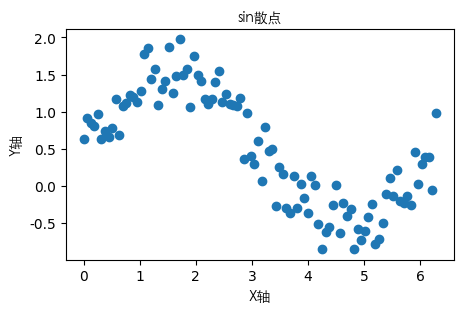

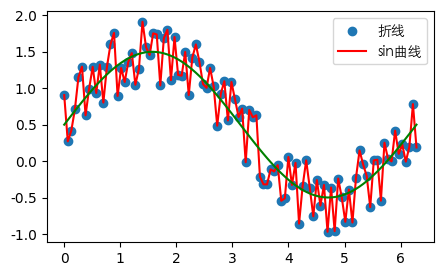

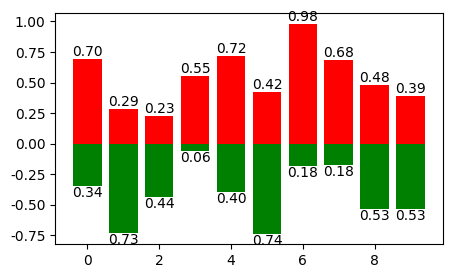

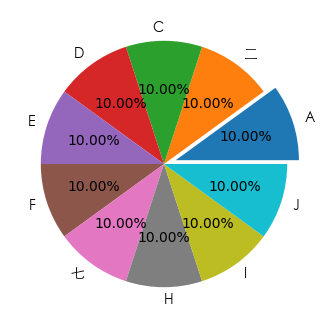

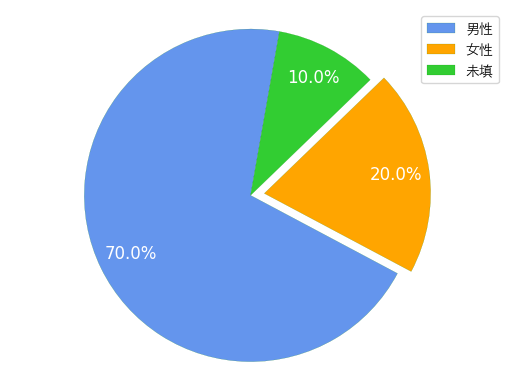

In [4]:
# VIII. 数据可视化1 matplotlib.pyplot
# -*- coding: UTF-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import warnings

from matplotlib import font_manager	 #matplotlib中 中文设置模块

#中文字体路径(先看好自己电脑中的路径)
zhfont = font_manager.FontProperties(fname = '/usr/share/fonts/truetype/cn/SimHei.ttf')
# title()、xlabel()、ylabel()中设置字体的参数为fontproperties, legend()设置字体参数为prop


# plt.rcParams['font.sans-serif']=['SimHei']###解决中文乱码
# plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

warnings.filterwarnings('ignore')
# plt.rcParams['font.sans-serif']=['Microsoft YaHei'] # 用来正常显示中文标签 SimHei 
# plt.rcParams['font.family']=['Microsoft YaHei']
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 1. 绘制散点图
x=np.linspace(0,2*np.pi,100)
y=np.sin(x)+np.random.random(len(x))

plt.figure(figsize=(5,3))
# plt.rcParams['font.sans-serif']=['SimHei'] # 解决中文乱码
# plt.rcParams['axes.unicode_minus']=False

plt.xlabel('X轴', fontproperties = zhfont) # , fontproperties = zhfont
plt.ylabel('Y轴', fontproperties = zhfont)

plt.title('sin散点', fontproperties=zhfont)
plt.scatter(x,y)
plt.show()


# 2. 绘制折线图
x=np.linspace(0,2*np.pi,100)
y=np.sin(x)+np.random.rand(100)

plt.figure(figsize=(5,3))
plt.scatter(x,y)
plt.plot(x,y,'r')
plt.plot(x,np.sin(x)+0.5,'g')
plt.legend(['折线','sin曲线'], prop=zhfont)
plt.show()


# 3. 绘制柱状图
x=range(10)
np.random.seed(123)
y1=np.random.random(10)
y2=np.random.random(10)

plt.figure(figsize=(5,3))
plt.bar(x,y1,facecolor='r')
plt.bar(x,-y2,facecolor='g')

for i,j in zip(x,y1):
    plt.text(i,j,'%.2f'%j,ha='center',va='bottom')

for i,j in zip(x,y2):
    plt.text(i,-j,'%.2f'%j,ha='center',va='top')

plt.show()


# 3. 绘制饼图
z=np.ones(10)
plt.figure(figsize=(4,4))
pp = plt.pie(z,autopct='%.2f%%',explode=[0.1]+[0]*9,labels=list('A二CDEF七HIJ'),labeldistance=1.1)

for front in pp[1]:
    front.set_fontproperties(zhfont)
    
plt.show()


# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # SimHei 'Microsoft YaHei'

labels = [u'男性', u'女性', u'未填']
# sizes = [male, female, other]
sizes = [70, 20, 10]
colors = ['cornflowerblue', 'orange', 'limegreen']
explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots()
pa = ax1.pie(sizes,
        explode=explode, # 指定饼图某些部分的突出显示
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',  # 百分比的格式 '%.2f%%'  '%1.1f%%'
        shadow=False, # 去掉了阴影shadow=True
        pctdistance = 0.8,  # 百分比标签与圆心的距离
        labeldistance = 1.1,  # 水平标签与圆心的距离
        startangle = 80,    # 饼图的初始角度 80 180
        radius = 1.2,    # 饼图的半径
        counterclock = True,    # 逆时针True, 顺时针方向False
        wedgeprops = {'linewidth' : 0.1, 'edgecolor' : 'green'},  # 饼图内外边界的属性值
        textprops={'fontsize': 12, 'color': 'w'},  # 文本标签的属性值, 白色
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper right', prop=zhfont) # 关键就是在于这里：添加一个图例

for front in pa[1]:
    front.set_fontproperties(zhfont)

plt.show()


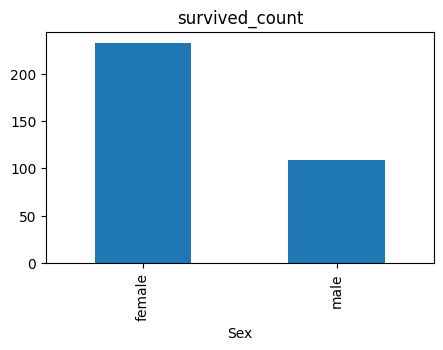

<Figure size 500x300 with 0 Axes>

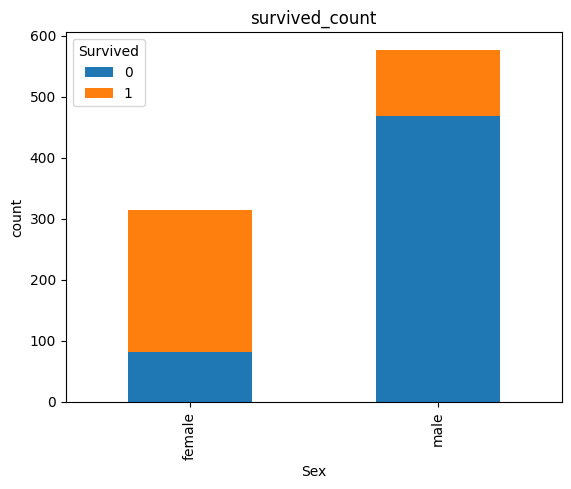

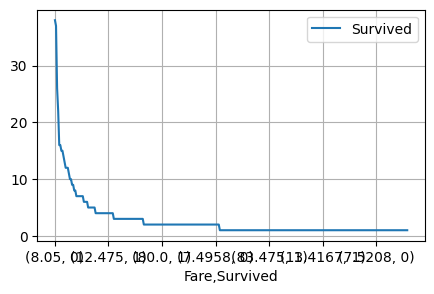

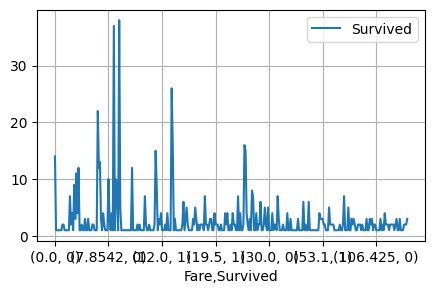

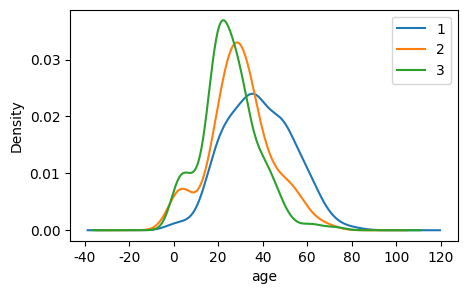

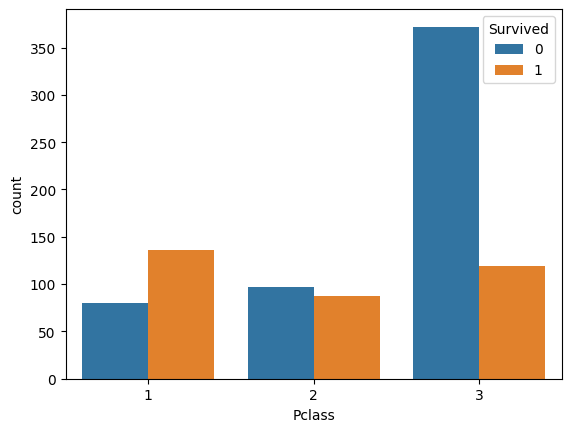

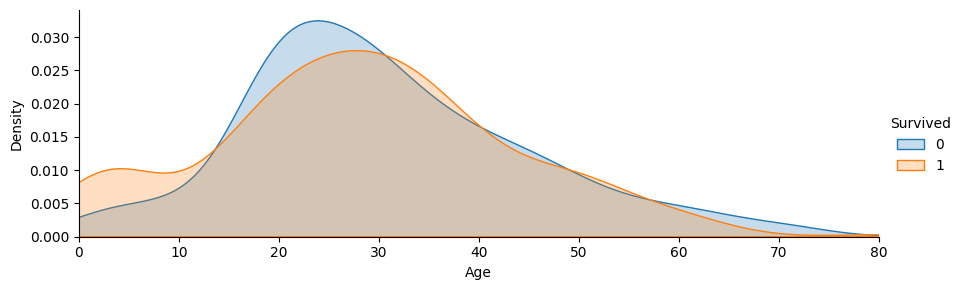

In [16]:
# VIII. 数据可视化2 

text = pd.read_csv('https://raw.githubusercontent.com/datawhalechina/hands-on-data-analysis/master/%E7%AC%AC%E4%BA%8C%E7%AB%A0%E9%A1%B9%E7%9B%AE%E9%9B%86%E5%90%88/result.csv') # 

sex = text.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(5,3))
sex.plot.bar()
plt.title('survived_count')
plt.show()

# 计算男女中死亡人数 1表示生存，0表示死亡
plt.figure(figsize=(5,3))
text.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('survived_count') 
plt.ylabel('count')

# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡
fare_sur = text.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(5,3))
fare_sur.plot(grid=True)
plt.legend()
plt.show()

# 排序前绘折线图
fare_sur1 = text.groupby(['Fare'])['Survived'].value_counts()
plt.figure(figsize=(5,3))
fare_sur1.plot(grid=True)
plt.legend()
plt.show()

# 不同仓位等级的人年龄分布情况。（用折线图试试）
plt.figure(figsize=(5,3))
text.Age[text.Pclass == 1].plot(kind='kde')
text.Age[text.Pclass == 2].plot(kind='kde')
text.Age[text.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")
plt.show()

# 不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试） 1表示生存，0表示死亡
pclass_sur = text.groupby(['Pclass'])['Survived'].value_counts()
sns.countplot(x="Pclass", hue="Survived", data=text)

# 不同年龄的人生存与死亡人数分布情况。(不限表达方式)
facet = sns.FacetGrid(text, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, text['Age'].max()))
facet.add_legend()



分类效果评估: 
1. 准确率: 
metrics.accuracy_score(y_true, y_pred) = 0.3333333333333333 
metrics.accuracy_score(y_true, y_pred, normalize=False) = 3 
metrics.precision_score(y_true, y_pred, average='micro') = 0.3333333333333333 
metrics.precision_score(y_true, y_pred, average='macro') = 0.375 
metrics.precision_score(y_true, y_pred, labels=[0, 1, 2, 3], average='macro') = 0.5 
2. 召回率: 
metrics.recall_score(y_true, y_pred, average='micro') = 0.3333333333333333 
metrics.recall_score(y_true, y_pred, average='macro') = 0.3125 
3. F1: 
metrics.f1_score(y_true, y_pred, average='weighted') = 0.37037037037037035 
4. 混淆矩阵: 
metrics.confusion_matrix(y_true, y_pred) = array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0]]) 
5. 分类报告: 
              precision    recall  f1-score   support

     class 0 

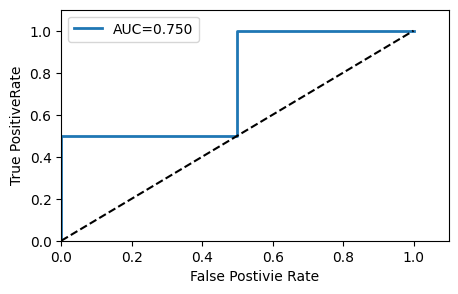

距离: 
8. 海明距离: 
metrics.hamming_loss(y_true, y_pred) = 0.25 
9. Jaccard距离: 
metrics.jaccard_score(y_true, y_pred, average='macro') = 0.6 
回归: 
10. 可释方差值(Explained variance score): 
metrics.explained_variance_score(y_true, y_pred) = 0.9571734475374732 
11. 平均绝对误差(Mean absolute error): 
metrics.mean_absolute_error(y_true, y_pred) = 0.5 
12. 均方误差(Mean squared error): 
metrics.mean_squared_error(y_true, y_pred) = 0.375 
13. 中值绝对误差(Median absolute error): 
metrics.median_absolute_error(y_true, y_pred) = 0.5 
14. R方值,确定系数: 
metrics.r2_score(y_true, y_pred) = 0.9486081370449679 


In [21]:
# 分类效果评估

print(f"分类效果评估: ") 
print(f"1. 准确率: ") 
# 第一种方式 accuracy_score
# import numpy as np
# from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3,9,9,8,5,8]
y_true = [0, 1, 2, 3,2,6,3,5,9]

print(f"{metrics.accuracy_score(y_true, y_pred) = } ") # 0.3333333333333333
print(f"{metrics.accuracy_score(y_true, y_pred, normalize=False) = } ")  # 类似海明距离, 每个类别求准确后, 再求微平均 # 3

# 第二种方式：metrics
# 宏平均比微平均更合理, 但也不是说微平均一无是处, 具体使用哪种评测机制, 还是要取决于数据集中样本分布
# 宏平均(Macro-averaging), 是先对每一个类统计指标值, 然后在对所有类求算术平均值. 
# 微平均(Micro-averaging), 是对数据集中的每一个实例不分类别进行统计建立全局混淆矩阵, 然后计算相应指标. 

print(f"{metrics.precision_score(y_true, y_pred, average='micro') = } ")  # 微平均, 精确率 # 0.3333333333333333
print(f"{metrics.precision_score(y_true, y_pred, average='macro') = } ")  # 宏平均, 精确率 # 0.375 
print(f"{metrics.precision_score(y_true, y_pred, labels=[0, 1, 2, 3], average='macro') = } ")  # 指定特定分类标签的精确率 # 0.5 
# average参数有五种：(None, 'micro', 'macro', 'weighted', 'samples')

print(f"2. 召回率: ") 
print(f"{metrics.recall_score(y_true, y_pred, average='micro') = } ")  # 0.33333333333333331
print(f"{metrics.recall_score(y_true, y_pred, average='macro') = } ")  # 0.3125

print(f"3. F1: ") 
print(f"{metrics.f1_score(y_true, y_pred, average='weighted') = } ")  # 0.37037037037037035

print(f"4. 混淆矩阵: ") 
print(f"{metrics.confusion_matrix(y_true, y_pred) = } ")  # 

print(f"5. 分类报告: ") 
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 2, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(metrics.classification_report(y_true, y_pred, target_names=target_names))
# print(f"{metrics.classification_report(y_true, y_pred, target_names=target_names) = } ") 

print(f"6. kappa score: ") 
# kappa score是一个介于(-1, 1)之间的数. score>0.8意味着好的分类；0或更低意味着不好(实际是随机标签)
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
print(f"{metrics.cohen_kappa_score(y_true, y_pred) = } ")  # 0.4285714285714286 

print(f"7. ROC值/ROC曲线: ") 
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print(f"{metrics.roc_auc_score(y_true, y_scores) = } ")

y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
auc = metrics.roc_auc_score(y, scores, average='micro')

plt.figure(figsize=(5, 3) )
plt.plot(fpr, tpr, linewidth=2, label='AUC=%.3f'%auc) 
plt.plot([0,1],[0,1],'k--') 
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate') 
plt.ylabel('True PositiveRate') 
plt.legend()
plt.show()


print(f"距离: ") 
print(f"8. 海明距离: ") 
y_pred = [1, 2, 3, 4]
y_true = [2, 2, 3, 4]
print(f"{metrics.hamming_loss(y_true, y_pred) = } ") # 0.25


print(f"9. Jaccard距离: ") 
y_pred = [0, 2, 1, 3,4]
y_true = [0, 1, 2, 3,4]
print(f"{metrics.jaccard_score(y_true, y_pred, average='macro') = } ") # 0.6 jaccard_similarity_score
# print(f"{metrics.jaccard_score(y_true, y_pred, average='macro', normalize=False) = } ") # 0.25


print(f"回归: ") 
print(f"10. 可释方差值(Explained variance score): ") 
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(f"{metrics.explained_variance_score(y_true, y_pred) = } ") # 0.9571734475374732 

print(f"11. 平均绝对误差(Mean absolute error): ") 
print(f"{metrics.mean_absolute_error(y_true, y_pred) = } ") # 0.5 

print(f"12. 均方误差(Mean squared error): ") 
print(f"{metrics.mean_squared_error(y_true, y_pred) = } ") # 0.375 

print(f"13. 中值绝对误差(Median absolute error): ") 
print(f"{metrics.median_absolute_error(y_true, y_pred) = } ") # 0.5 

print(f"14. R方值,确定系数: ") 
print(f"{metrics.r2_score(y_true, y_pred) = } ") # 0.9486081370449679  



In [ ]:
# AUC 和 F1的异同
# 相同点：
# 分析的起点是这两个指标存在一个共同目标. 事实上：
# r e c a l l = T P R = T P T P + F N recall = TPR = \frac{TP}{TP + FN}recall=TPR=TP+FNTP​
# 也就是说auc和f1 score都希望将样本中实际为真的样本检测出来(检验阳性). 
# 不同点：
# auc希望训练一个尽量不误报的模型, 也就是知识外推的时候倾向保守估计, 
# 而f1希望训练一个不放过任何可能的模型, 即知识外推的时候倾向激进, 这就是这两个指标的核心区别. 

# 如何选择：
# 所以在实际中, 选择这两个指标中的哪一个, 取决于一个trade-off. 
# 如果我们犯检验误报错误的成本很高, 那么我们选择auc是更合适的指标. 如果我们犯有漏网之鱼错误的成本很高, 那么我们倾向于选择f1score. 

# 放到实际中, 对于检测传染病, 相比于放过一个可能的感染者, 我们愿意多隔离几个疑似病人, 所以优选选择F1score作为评价指标. 
# 而对于推荐这种场景, 由于现在公司的视频或者新闻库的物料总量是很大的, 潜在的用户感兴趣的item有很多, 所以我们更担心的是给用户推荐了他不喜欢的视频, 导致用户体验下降, 而不是担心漏掉用户可能感兴趣的视频. 
# 所以推荐场景下选择auc是更合适的. 

# 7 不同场景下的准确率与召回率的解读
# 召回率
# 正样本有多少被找出来了(召回了多少)recall描述模型“把正样本叫 (call) 回来(re)”的能力. 
# 准确率
# 你认为的正样本, 有多少猜对了(猜的精确性如何)
# precision描述模型“叫回来的正样本”有多少是精确的. 

# 召回率高, 准确率低, 
# 可能预测为负样本的很多, 召回率比较低, 但是准确率比较高；
# 常见在：正负样本分布很不均匀, 负样本很多的情况；
# 解决：需要根据具体问题做离线交叉验证去找到最好的比例；正负样本不太均匀；新增正样本
# 离线交叉验证, 是咋做？

# 召回率低, 准确率高
# 出现的场景, 模型缺少特征, 只是很精准的找到一部分；看着加一些特征工程
# 可能预测为正样本的很多, 势必造成了正样本很多, 但是错误也很多
# 常见在：模型特征工程没做好；或者验证集和训练集分布差异比较大；或者训练集数据太小；或者代码问题；或者正负样本重合很大, 容易混淆
# 解决：分析Bad case, PRC, 各个特征的权重分布, 剔除无效特征, 增加有效特征；需要对错误的标注样本进行修正

# 召回率低, 准确率低
# 常见在：正负样本重合很大, 容易混淆

# 7.1 推荐系统中的准确与召回文章见：推荐策略之召回
# 召回率和准确率有时存在相互制衡的情况, 好的召回策略应该在保证高准确率的情况下也保证高召回率. 
# 基于内容匹配的召回, 基于内容匹配的召回率较高, 但准确率较低, 比较适用于冷启动的语义环境

# 根据内容兴趣去找, 可能找到你之前没有记录过的兴趣, 这种就是召回率高, 但是准确率低
# 可能在你的历史兴趣之外, 去找一些兴趣点
# 基于协同过滤的召回, 基于协同过滤的召回即建立用户和内容间的行为矩阵, 依据“相似性”进行分发. 这种方式准确率较高, 但存在一定程度的冷启动问题. 
# 根据之前你的兴趣推荐你感兴趣的, 就是在你的历史行为里面做推荐, 会比较精准
# 两者结合：历史行为推荐(协同过滤) + 兴趣发散推荐(内容匹配/推荐)

# 7.2 质检中的召回率、准确率的取舍
# 负向质检项：通常“召回率”优先负向质检, 就是找出不合格、不合规的地方. 通俗地说, 在销售、客服质检中, 是指找出业务员“说了什么不该说的”. 负向质检是企业比较常见的需求, 尤其是在受监管比较严格的领域. 
# 宁可错杀一片, 不可放过一个

# 正向质检项：通常“准确率”优先正向质检, 是指对业务员符合规范的地方进行加分激励. 最近几年, 正向质检越来越受到企业重视, 因为负向质检判断的只是业务员有没有犯错, 是一种“惩恶”的理念, 而正向质检可以用来激励业务员变得更加专业、更加规范, 是一种“扬善”的理念, 更有利于形成正向循环. 
# 宁可漏掉几个, 不可错杀一片



In [24]:
# 混淆矩阵/ROC) 合理的进行绘图
%matplotlib inline 
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,recall_score,classification_report,confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def CalculationResults(val_y,y_val_pred,simple = False,\
                       target_names = ['class_-2_Not_mentioned','class_-1_Negative','class_0_Neutral','class_1_Positive']):
    # 计算检验
    F1_score = f1_score(val_y,y_val_pred, average='macro')
    if simple:
        return F1_score
    else:
        acc = accuracy_score(val_y,y_val_pred)
        recall_score_ = recall_score(val_y,y_val_pred, average='macro')
        confusion_matrix_ = confusion_matrix(val_y,y_val_pred)
        class_report = classification_report(val_y, y_val_pred, target_names=target_names)
        print('f1_score:',F1_score,'ACC_score:',acc,'recall:',recall_score_)
        print('\n----class report ---:\n',class_report)
        #print('----confusion matrix ---:\n',confusion_matrix_)

        # 画混淆矩阵
            # 画混淆矩阵图
        plt.figure()
        plot_confusion_matrix(confusion_matrix_, classes=target_names,
                              title='Confusion matrix, without normalization')
        plt.show()
        return F1_score,acc,recall_score_,confusion_matrix_,class_report


In [2]:
# sklearn模型建立及评估
# 读取数据
# data = pd.read_csv('clear_data.csv') 
# clear_data = pd.read_csv('https://raw.githubusercontent.com/datawhalechina/hands-on-data-analysis/master/%E7%AC%AC%E4%B8%89%E7%AB%A0%E9%A1%B9%E7%9B%AE%E9%9B%86%E5%90%88/clear_data.csv') # 

train = pd.read_csv('https://raw.githubusercontent.com/datawhalechina/hands-on-data-analysis/master/%E7%AC%AC%E4%B8%89%E7%AB%A0%E9%A1%B9%E7%9B%AE%E9%9B%86%E5%90%88/train.csv') # 

# 填充数据
train['Cabin'] = train['Cabin'].fillna('NA')  #对分类变量进行填充, 填充值为‘NA’ 
train['Age'] = train['Age'].fillna(train['Age'].mean()) # 对连续变量进行填充, 填充值为该特征的平均值

# 检查缺失值比例
print(f"train.isnull().mean().sort_values(ascending=False) :\n{ train.isnull().mean().sort_values(ascending=False)}\n")

# 编码分类变量
data = train[['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']] # 取出输入特征
data = pd.get_dummies(data) # 对分类变量进行one-hot编码

# 划分数据集
X = data
y = train['Survived']

# 对数据集进行切割
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=0)

# 模型搭建
lr = linear_model.LogisticRegression() # 创建默认参数的逻辑回归模型
rfc = ensemble.RandomForestClassifier() # 默认参数的随机森林分类模型

#使模型拟合数据
lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# 输出模型的预测结果
pred = lr.predict(X_train)
print( f"{ pred[:10] = }" ) # array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

# 预测标签概率
pred_proba = lr.predict_proba(X_train)
print( f"{ pred_proba[:10] = }" )

# 用5折交叉验证来评估逻辑回归模型的score
lr = linear_model.LogisticRegression(C=100,max_iter=10000)
scores = model_selection.cross_val_score(lr, X_train, y_train, cv=5)
print( f"{ scores.mean() = }" )  

# 模型评估 模型泛化能力 指标：
# support 支持, 真实real结果中有多少是该类别; Real总 = R0 + R1 =Pre总 =P0(p00 +p01) +P1(p10 +p11) ; 
# 1、准确率accuracy 样本被预测pre分类/正确的比例; accuracy=(p00+p11)/Pre总 ; ACC=(TP+TN)/Pre总(=P+N) ;
# 2、精确率precision=TP/(TP+FP)和TN/(TN+FN) 被预测p为正例的样本中有多少是真正的正例; 预测为x的样本中,有多少被正确预测为x, p00/P0 , p11/P1 ; 真阳率/查出率TPR=TP/(TP+FN) , 假阳率/误检率FPR=FP/(FP+TN); 
# 3、召回率recall或敏感度sensitivity正标签1=TP/(TP+FN)和TN/(TN+FP) 或特异性specificity负标签0,正类样本中有多少被预测为正类; 实际为x的类别中,有多少预测为x; x∈(0,1); p00/R0 , p11/R1
# 4、f-分数f1-score 准确率与召回率的调和平均; F1分数=2*precision*recall/(precision+recall) ; 

#  real\pre  0      1       precision精确率  recall召回率   f1-score f-分数               support
#  0 412 [[TN/350 FP/62]    0.83=350/422    0.85=350/412   0.84=2*0.83*0.85/(0.83+0.85)  412   
#  1 256  [FN/72  TP/184]]  0.75=184/246    0.72=184/256   0.73=2*0.75*0.72/(0.75+0.72)  256 
#    668   422    246 accuracy准确率0.80=(350+184)/668  macroavg直接平均; weightedavg加权support平均

# 计算精确率precision, 召回率recall, 以及f-分数f1-score
# 训练模型
lr = linear_model.LogisticRegression(C=100, max_iter=10000)
lr.fit(X_train, y_train)
pred = lr.predict(X_train)

# 混淆矩阵 
# [[TN,FP],[FN,TP]] ; TN:TrueNegative真阴性, FP:FalseNegative假阴性, TP:TruePositive真阳性, FP:FalsePositive假阳性,
print('\n', f"metrics.confusion_matrix(y_train, pred): \n{ metrics.confusion_matrix(y_train, pred)}" ) 
# array([[350   62], [ 72  184]], dtype=int64)  

# 精确率、召回率以及f1-score
# print(f"{ metrics.classification_report(y_train, pred) = }" ) 
print('\n', metrics.classification_report(y_train, pred) )


train.isnull().mean().sort_values(ascending=False) :
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
dtype: float64

 pred[:10] = array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1])
 pred_proba[:10] = array([[0.61193687, 0.38806313],
       [0.14164313, 0.85835687],
       [0.47360168, 0.52639832],
       [0.19790891, 0.80209109],
       [0.87068966, 0.12931034],
       [0.91193779, 0.08806221],
       [0.13192909, 0.86807091],
       [0.90836518, 0.09163482],
       [0.0490121 , 0.9509879 ],
       [0.12518541, 0.87481459]])
 scores.mean() = 0.802300527437998

 metrics.confusion_matrix(y_train, pred): 
[[350  62]
 [ 72 184]]

               precision    recall  f1-score   support

           0       0.83      0.85      0.84       412
           1       0.75      

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


 metrics.accuracy_score(y_train, pred) = 0.7994011976047904
 metrics.accuracy_score(y_train, pred, normalize=False) = 534
 metrics.precision_score(y_train, pred) = 0.7479674796747967
 metrics.precision_score(y_train, pred, average='micro') = 0.7994011976047904
 metrics.recall_score(y_train, pred, average='micro') = 0.7994011976047904
 metrics.f1_score(y_train, pred, average='micro') = 0.7994011976047903
 metrics.roc_auc_score(y_train, pred, average='micro') = 0.7841322815533981


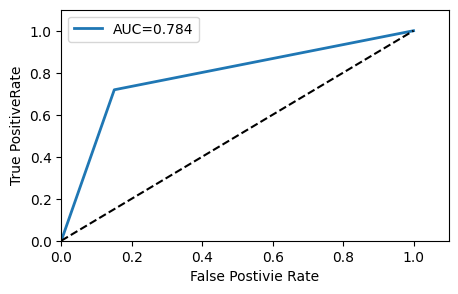

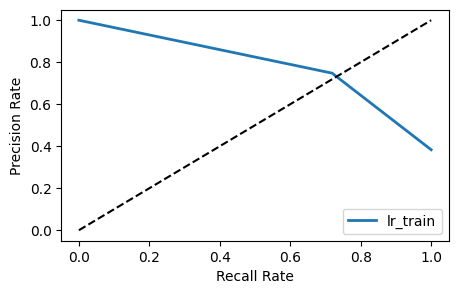

In [3]:
print( f"{ metrics.accuracy_score(y_train, pred) = }" )  
print( f"{ metrics.accuracy_score(y_train, pred, normalize=False) = }" )  

print( f"{ metrics.precision_score(y_train, pred) = }" )  
print( f"{ metrics.precision_score(y_train, pred, average='micro') = }" )  
print( f"{ metrics.recall_score(y_train, pred, average='micro') = }" )  
print( f"{ metrics.f1_score(y_train, pred, average='micro') = }" )  

# ROC图和AUC值
auc = metrics.roc_auc_score(y_train, pred, average='micro')
print( f"{ metrics.roc_auc_score(y_train, pred, average='micro') = }" )  

ap = metrics.average_precision_score(y_train, pred)

fpr,tpr,thresholds = metrics.roc_curve(y_train.ravel(),pred.ravel() )

plt.figure(figsize=(5, 3) )
plt.plot(fpr, tpr, linewidth=2, label='AUC=%.3f'%auc) 
plt.plot([0,1],[0,1],'k--') 
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate') 
plt.ylabel('True PositiveRate') 
plt.legend()
plt.show()

# P-R曲线 二分类问题 多类分类问题不能用P-R曲线
precision, recall, thresholds = metrics.precision_recall_curve(y_train, pred) 
plt.figure(figsize=(5, 3) )
plt.plot(recall, precision, linewidth=2, label="lr_train") 
plt.plot([0,1],[0,1],'k--')
plt.axis([-0.05, 1.05, -0.05, 1.05]) 
plt.xlabel("Recall Rate")
plt.ylabel("Precision Rate")
plt.legend()
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


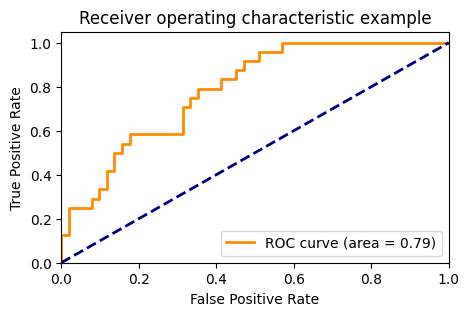

In [4]:
# ROC曲线和AUC
# 导入鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # X.shape==(150, 4)
y = iris.target  # y.shape==(150, )

# 二进制化输出
y = preprocessing.label_binarize(y, classes=[0, 1, 2])  # shape==(150, 3)
n_classes = y.shape[1]  # n_classes==3

# 添加噪音特征, 使问题更困难
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape  # n_samples==150, n_features==4
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]  # shape==(150, 84)

# 打乱数据集并切分训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.5, random_state=0)
# X_train.shape==(75, 804), X_test.shape==(75, 804), y_train.shape==(75, 3), y_test.shape==(75, 3)

# 学习区分某个类与其他的类
classifier = multiclass.OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# y_score.shape==(75, 3)

# 为每个类别计算ROC曲线和AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):  #classes 多少个类别      也是一列对一列
      fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i]) #每个类别对应一对 fpr 和tpr
#二分类的时候 二者的ROC曲线是同一个 
      roc_auc[i] = metrics.auc(fpr[i], tpr[i])

plt.figure(figsize=(5, 3) )
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

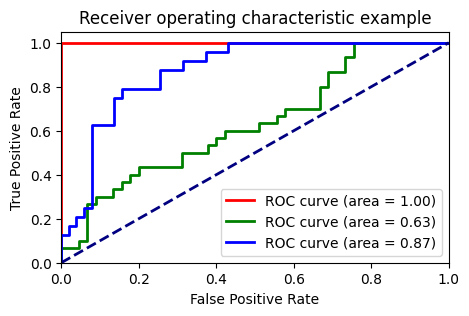

In [5]:
# 多分类器 OvR实现

import numpy as np
from sklearn import svm,datasets
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


#加载鸢尾数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

#将数据二进制化处理, 此处和onehotencoder大概一致
y = label_binarize(y,classes=[0,1,2])
n_classes = y.shape[1]

#加入噪点
n_sample,n_featrues = X.shape
X = np.c_[X,np.random.RandomState(0).randn(n_sample,80*n_featrues)]

#分割数据
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.5,random_state=0)

#设置分类器, 这里实用的是SVC支持向量机
clf =SVC(C=0.2,gamma=0.2,kernel='linear', probability=True, random_state=0)
classifier = OneVsRestClassifier(clf,n_jobs=-1)
classifier.fit(X_train, y_train)
#计算分数, roc_curve要用到
y_score = classifier.decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
#计算aoc值
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])


#画图
plt.figure(figsize=(5, 3) )
lw = 2
color = ['r', 'g', 'b']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=color[i],lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
import numpy as np
import warnings
warnings.filterwarnings("ignore") # 这个方法只是解决了表面, 没有根治

# 数据(特征, 属性)
x_train = np.array([[1, 2, 3], [1, 5, 4], [2, 2, 2], [4, 5, 6], [3, 5, 4], [1, 7, 2]])
y_train = np.array([1, 0, 1, 1, 0, 0]) # 数据的标签
x_test = np.array([[2, 1, 2], [3, 2, 6], [2, 6, 4]]) # 测试数据

# 导入模型
model = LogisticRegression()
#model = RandomForestClassifier()
# model=XGBClassifier()

model.fit(x_train, y_train)

print(f"{model.predict(x_test)}" ) # 返回预测标签
print(f"{model.predict_proba(x_test)}" ) # 返回预测属于某标签的概率

train_score = model.score(x_train, y_train)
cv_score = model.score(X_test, y_test)




[1 1 0]
[[0.06172581 0.93827419]
 [0.03790071 0.96209929]
 [0.85359552 0.14640448]]


In [ ]:
# １对数据划分训练集和测试集　聚类则不需要
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=123)

# ２选择合适的算法进行训练　生成模型对象(这里以决策树解决分类问题为例)
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', #--设置衡量的系数
                                    max_depth=4, #--设置树的最大深度
                                    min_samples_split=10,#--节点的最少样本数
                                    min_samples_leaf=5 #-- 叶节点的最少样本数
                                    )
#　３训练好模型对象(使用训练集)
clf = clf.fit(x_train,y_train) # -- 拟合训练
#　４测试训练结果(使用测试集)
y_pred=clf.predict(x_test)
#  ５验证模型准确率
# 预测正确样本数量/测试集样本总数量

# 　６参数调优(仅以树深度为例)
# 构建一个函数,使用不同的深度来训练模型,并计算评分数据
def cv_score(d):
    clf2=tree.DecisionTreeClassifier(max_depth=d)
    clf2=clf2.fit(x_train,y_train)
    # 训练集分数    
    tr_score=clf2.score(x_train,y_train)
    # 测试集分数  
    cv_score=clf2.score(x_test,y_test)
    return (tr_score,cv_score)
# 构造参数范围　选择准确率最高的深度
depths=range(2,15)
scores=[cv_score(d) for d in depths]

In [6]:
# 构建模型
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# 1.数据导入
data = load_boston()

print(f"{data.keys() = } \n{data['data'][:2] = } \n{ len(data['data']) = }")

# 将data['data']和data['target']两类数据都切割为两份
train_data,test_data,train_target,test_target=train_test_split(data['data'],data['target'],test_size=0.2)

print(f"{train_data.shape = } \n{test_data.shape = } \n{ train_target.shape = } \n{ test_target.shape = }")

# 2.构建离差标准化模型
model = MinMaxScaler().fit(train_data)
model.transform(train_data)

# model.transform(train_data)
train_data_mms = model.transform(train_data)
# model.transform(test_data)
test_data_mms = model.transform(test_data)

# 3.利用PCA进行降维
model = PCA(n_components=8).fit(train_data_mms) # 通过其fit()函数制定规则
# model.transform(train_data_mms).shape
train_data_mms=model.transform(train_data_mms)
# model.transform(test_data_mms).shape
test_data_mms=model.transform(test_data_mms)

# 4.使用sklearn估计器进行聚类分析
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
data = load_iris()
# 使用KMeans聚类模型将数据data['data']数据分为三类
KMeans(n_clusters=3).fit(data['data'])

# 可以查看聚类中心
model.cluster_centers_

#通过可视化查看聚类效果
import matplotlib.pyplot as plt
for i in range(3):
    plt.scatter(data['data'][model.labels_==i,0],data['data'][model.labels_==i,1])
plt.show()

#聚类模型评价
from sklearn.metrics import silhouette_score
silhouette_score(data['data'],model.labels_)

#分析聚为几类比较好
for k in range(2,9):
    model=KMeans(n_clusters=k).fit(data['data'])
    print(k,silhouette_score(data['data'],model.labels_))
    
# 5.使用sklearn估计器进行分类分析
#导入数据
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
#获取数据
x=data['data']
#是否是乳腺癌
y=data['target']

#划分训练集, 测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#模型预处理
x_train.shape    
    
#查看每一列的最大值
import numpy as np
#将科学计数法转为数值
np.int32(x_train.max(axis=0))

#对数据进行标准化离散标准化处理
from sklearn.preprocessing import StandardScaler
model=StandardScaler().fit(x_train)
x_train_ss=model.transform(x_train)
x_test_ss=model.transform(x_test)


#检验标准化后的最大值结果
x_train_ss.max(axis=0)
#分类模型构建
from sklearn.svm import SVC
#构建SVC模型
model=SVC().fit(x_train_ss,y_train)
#对模型进行预测, 并输出预测结果
model.predict(x_test_ss)

#再看和真实值对比, 看泛化能力
y_test

#直接计算真实值与训练值的准确率
y_pre=model.predict(x_test_ss)
model.score(x_test_ss,y_test)

#分类模型的评价指标
from sklearn.metrics import recall_score,precision_score,f1_score,roc_curve
#召回率
print(recall_score(y_test,y_pre))
#准确率
print(precision_score(y_test,y_pre))
#综合衡量召回率和准确率
print(f1_score(y_test,y_pre))


fpr,tpr,thresholds=roc_curve(y_test,y_pre)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

# 6.使用sklearn估计器构建回归模型
from sklearn.datasets import load_boston
data=load_boston()
x=data['data']
y=data['target']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train,y_train)

model.predict(x_test)

y_pre=model.predict(x_test)

import matplotlib.pyplot as plt
plt.plot(range(len(y_test)),y_test)
plt.plot(range(len(y_pre)),y_pre)
plt.legend(['real','predict'])
plt.show()

from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_true=y_test,y_pred=y_pre)
r2_score(y_true=y_test,y_pred=y_pre)






data.keys() = dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module']) 
data['data'][:2] = array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]]) 
 len(data['data']) = 506
train_data.shape = (404, 13) 
test_data.shape = (102, 13) 
 train_target.shape = (404,) 
 test_target.shape = (102,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.datasets import load_iris
dataSet = load_iris()
data = dataSet['data'] # 数据
label = dataSet['target'] # 数据对应的标签
feature = dataSet['feature_names'] # 特征的名称
target = dataSet['target_names'] # 标签的名称

print(f"{data[:2] = } \n{label[:9] = } \n{feature = } \n{target = }   ")

ss = ShuffleSplit(n_splits = 1,test_size= 0.2) # 按比例拆分数据, 80%用作训练
for tr,te in ss.split(data, label):
    xr = data[tr]
    xe = data[te]
    yr = label[tr]
    ye = label[te]
    clf = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial') 
    clf.fit(xr,yr)
    predict = clf.predict(xe)
    print(classification_report(ye, predict))

# 得到所用客户的标签
kmeans_model.labels_   #array([4, 4, 4, ..., 3, 0, 3], dtype=int32)
# 保存不同客户类别的数目 将分类标签映射回原数据
airline_features['label']=kmeans_model.labels_
airline_features.head()

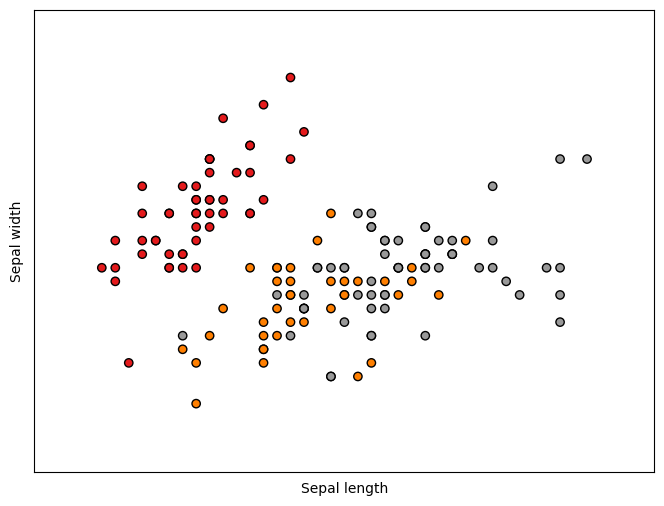

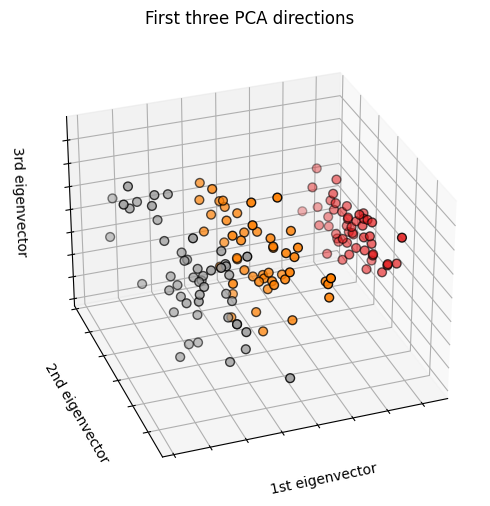

In [12]:
# The Iris Dataset
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

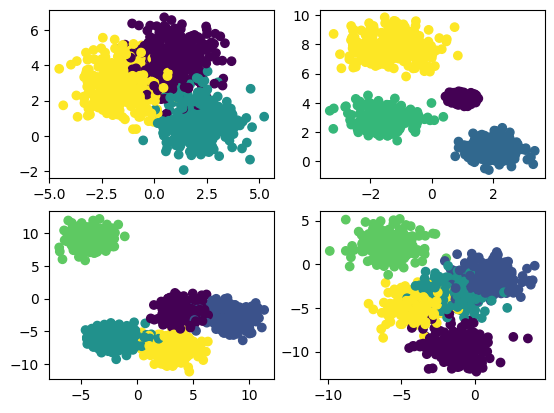

In [21]:
import matplotlib.pyplot as plt

data1,target1= datasets.make_blobs(n_samples=1000,n_features=2,random_state=0)  # random_state是随机数种子, 便于复现
data2,target2= datasets.make_blobs(n_samples=1000,n_features=2,random_state=0,centers=4,cluster_std=[0.2,0.5,0.6,0.8]) # centers是类数量, 默认为3
data3,target3 = datasets.make_blobs(n_samples=1000,n_features=2,shuffle=True,centers=5,cluster_std=1.2) # cluster_std是标准差, 可以设置一样, 或每个类设置一个
data4,target4 = datasets.make_blobs(n_samples=1000,n_features=2,shuffle=True,random_state=2,centers=5,cluster_std=1.2) # shuffle是可以打乱
fig,axes = plt.subplots(2,2)
axes[0,0].scatter(data1[:,0],data1[:,1],c=target1)
axes[0,1].scatter(data2[:,0],data2[:,1],c=target2)
axes[1,0].scatter(data3[:,0],data3[:,1],c=target3)
axes[1,1].scatter(data4[:,0],data4[:,1],c=target4)
plt.show()

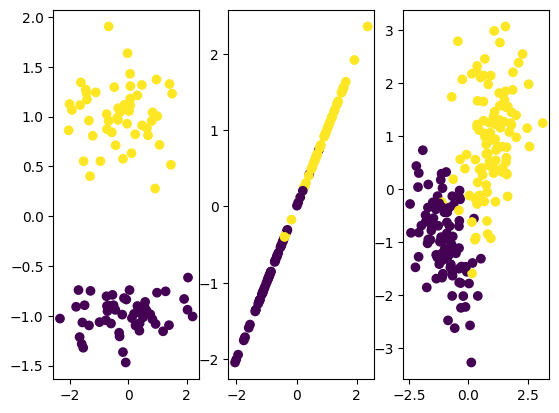

In [22]:
data1,target1 = datasets.make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_repeated=0,n_clusters_per_class=1)
data2,target2= datasets.make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_repeated=1,n_clusters_per_class=1)
data3,target3= datasets.make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0,n_repeated=0,n_clusters_per_class=1)

fig,axes = plt.subplots(1,3)
axes[0].scatter(data1[:,0],data1[:,1],c=target1)
axes[1].scatter(data2[:,0],data2[:,1],c=target2)
axes[2].scatter(data3[:,0],data3[:,1],c=target3)
plt.show()

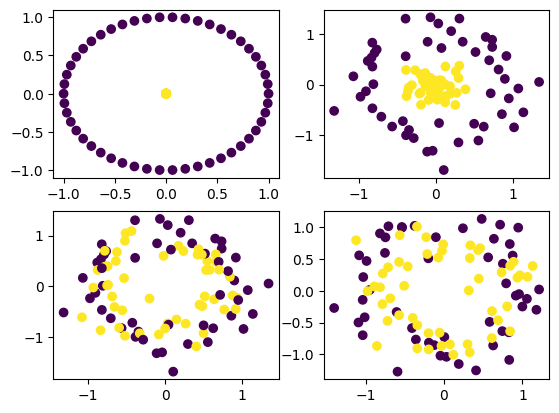

In [23]:
data1,target1 = datasets.make_circles(n_samples=100,shuffle=True,noise=0,random_state=0,factor=0)
data2,target2 = datasets.make_circles(n_samples=100,shuffle=True,noise=0.2,random_state=0,factor=0)
data3,target3 = datasets.make_circles(n_samples=100,shuffle=True,noise=0.2,random_state=0,factor=0.8)
data4,target4 = datasets.make_circles(n_samples=100,shuffle=False,noise=0.2,random_state=56,factor=0.8)
fig,axes = plt.subplots(2,2)
axes[0,0].scatter(data1[:,0],data1[:,1],c=target1)
axes[0,1].scatter(data2[:,0],data2[:,1],c=target2)
axes[1,0].scatter(data3[:,0],data3[:,1],c=target3)
axes[1,1].scatter(data4[:,0],data4[:,1],c=target4)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

print(model.normalize)
print(model)

import numpy as np
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
model.fit(X, y) # model.fit(X, y[:,np.newaxis])
print(model.coef_) # Estimated parameters  y=(model.coef_)*x
print(model.predict(np.array([3,4,5])[:, np.newaxis])) # [ 3.  4.  5.]

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression()
model.fit(data_X, data_y)

print(model.predict(data_X[:4, :]))     #训练后预测结果
print(data_y[:4])                       #真实的结果